### Student Details

Student name: ESPINOUX Jules

Student ID: 24267228

## Part 1: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function

In [98]:
import pandas as pd
import numpy as np
from pathlib import Path
from plot_decision_boundary import plot_decision_boundary

path = Path.cwd().joinpath('iris_data.csv')
df = pd.read_csv(path, header=0)

# petal length and petal width
X = df.iloc[:, [2,3]].values
# Replace the strings with numeric labels (point 1 above)
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

In [99]:
################################
# Your code here

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2 ###

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

### 3 ###

scaler = StandardScaler()
scaler.fit(X_train)

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

print(X_train_transformed)
print(X_test_transformed)


[[-1.26672365 -1.4525971 ]
 [ 0.99913637  0.81987076]
 [ 0.99913637  0.81987076]
 [ 0.54596437  0.28517244]
 [-1.26672365 -1.31892252]
 [ 0.43267137  0.15149786]
 [ 1.05578287  0.28517244]
 [ 1.79218738  1.48824366]
 [-1.38001665 -1.31892252]
 [-1.26672365 -1.31892252]
 [-1.26672365 -1.31892252]
 [ 0.77255037  0.41884702]
 [-1.43666315 -1.31892252]
 [ 0.20608536 -0.24952588]
 [ 0.20608536  0.15149786]
 [ 0.26273186  0.41884702]
 [-0.02050064 -0.24952588]
 [-0.24708664 -0.24952588]
 [-1.38001665 -1.31892252]
 [ 0.82919687  1.08721992]
 [ 0.99913637  1.2208945 ]
 [ 0.77255037  0.95354534]
 [-1.32337015 -1.4525971 ]
 [-1.15343065 -0.91789878]
 [ 0.60261087  0.81987076]
 [-1.15343065 -1.05157336]
 [ 1.28236888  1.75559282]
 [-1.32337015 -1.31892252]
 [-1.21007715 -1.31892252]
 [ 0.71590387  0.95354534]
 [ 0.82919687  1.48824366]
 [ 0.26273186  0.01782328]
 [ 0.43267137  0.41884702]
 [-1.43666315 -1.31892252]
 [ 0.31937837  0.15149786]
 [ 1.05578287  1.2208945 ]
 [ 0.14943886  0.01782328]
 

### Using Support Vector Classifier

(<Figure size 640x480 with 1 Axes>, <Axes: >)

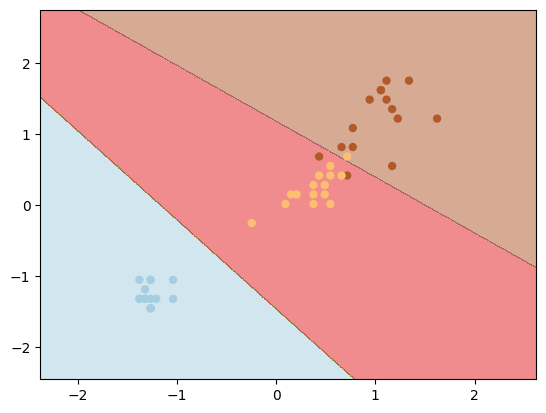

In [101]:
from sklearn.svm import SVC

### 4 ###

svc = SVC(kernel='linear')

svc.fit(X_train_transformed, y_train)
y_predicted = svc.predict(X_test_transformed)

### 5 ###

plot_decision_boundary(X_test_transformed, y_test, svc, steps=1000, cmap='Paired')


## Part 2: Investigating non-linear SVMs
Some problems are not linearly solvable, and SVMs offer a means of treating non-linear using kernels. The most used kernels are linear (i.e. no kernel, or what you implemented in the previous part) and Gaussian (or Radial Basis Function). 

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM. 

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data  (choose a soft gamma value of 0.1) 
2. Plot the decision boundaries using the provided function
3. Change the gamma value to 100. What happens? What is the problem with this result? Describe what is happening based on the resources given in the activity.
4. Play around with the gamma value a bit to see how it changes

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

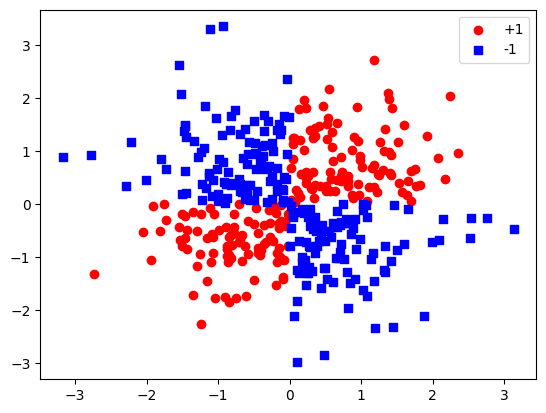

In [105]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

Gamma = 0.1
Gamma = 10
Gamma = 50
Gamma = 100


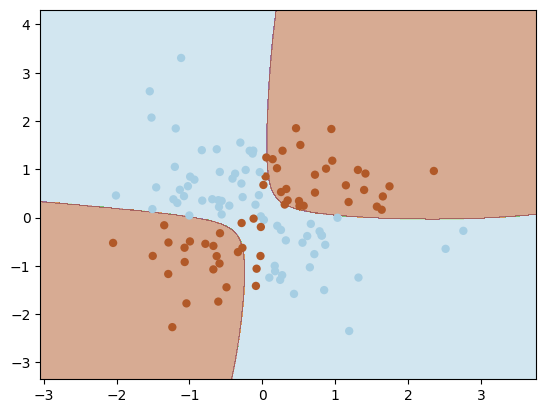

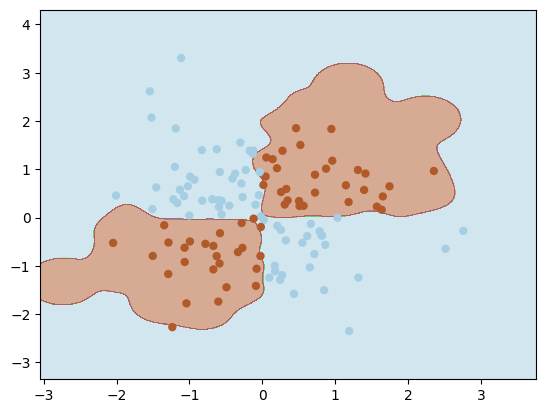

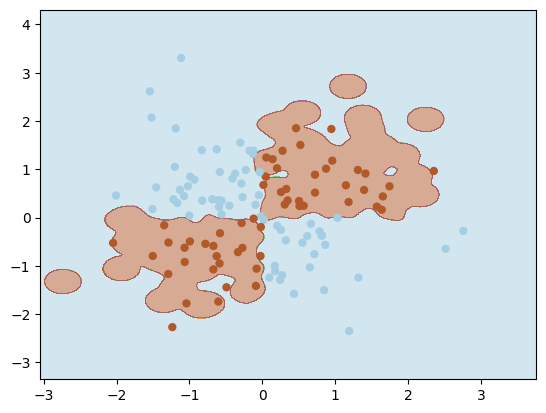

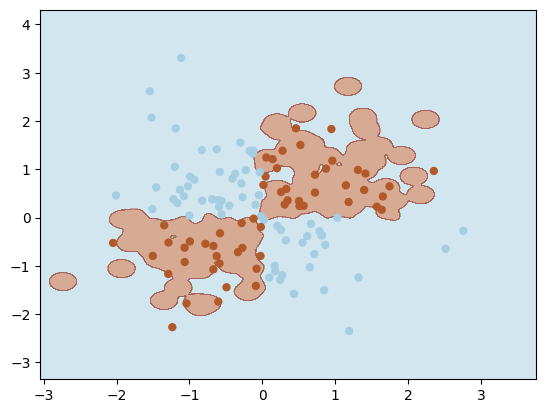

In [117]:
################################
# Your code here

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.30)

gamma_list = [0.1, 10, 50, 100]

for gamma in gamma_list:
    
        svc = SVC(kernel='rbf', gamma=gamma)
        svc.fit(X_train, y_train)

        y_predicted = svc.predict(X_test)
        
        print("Gamma = " + str(gamma))
        plot_decision_boundary(X_test, y_test, svc, steps=1000, cmap='Paired')





As demonstrated in the four plots above, increasing gamma leads to greater overfitting of the model, which negatively impacts its predictive accuracy.




## Part 3: Support Vector Machine for Network Intrusion Detection

We will use the NSL-KDD dataset to do a binary and multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. In the Python Notebook, a breakdown of the different types of features is provided.

1. Provide a bar graph showing the breakdown of the number of different attack categories in the training set (1 or 0 for the binary classifier, multi: benign, dos, probe, r2l, u2r)
2. We cannot directly use categorical features in our support vector machine training. A piece of code is provided that handles the categorical features. Please describe what the pd.get_dummies() function call does, and why it helps. You may need to look up the documentation.
3. Apply the standard scaling to just the numeric features of the dataset (it does not make any sense to apply the scaler to binary features). Note, that you should still train on both the binary and the numeric features.
4. Binary SVM Classification: Train a linear classifier (with all default parameters except setting the kernel to linear) using the binary target variable (attack or not). Print the confusion_matrix and accuracy_score from sklearn.metrics. Briefly explain these two results.
5. Binary non-linear SVM: Train a non-linear classifier to see if you can beat the linear classifier. Set the kernel to rbf, and start with gamma=0.1. Print the confusion matrix and error. It might return an accuracy slightly higher than the linear SVM, but see if you can tweak the gamma parameter to get a better result. What gamma value gave you the best result? (when I was doing this, I got an accuracy of almost 0.78).
6. Multi-class SVM: Train a linear, multi-class SVM, and print the confusion matrix and the accuracy score. Discuss the results briefly.

#### Provided Code

The output of this piece of code is the following

`train_X`, `test_X` - the train and test set of features

`train_Y_bin`, `test_Y_bin` - the train and test target data for binary classification: 1 - attack, 0 - benign/normal

`train_Y_multi`, `test_Y_multi` - the train and test target variable data for multi-class: (`benign`, `dos`, `probe`, `r2l`, `u2r`)

`nominal_cols` - the names of the column headers that contain nominal/categorical data

`binary_cols` - the names of the column headers that contain binary data

`numeric_cols` - the names of the column headers that contain numerical data

In [118]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()   # The columns that have nominal/categorical features
binary_cols = col_names[binary_idx].tolist()     # The columns that have binary features
numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y_multi = train_df['attack_category']
train_Y_bin = train_df['attack_binary']
train_X_raw = train_df.drop(['attack_category','attack_binary'], axis=1)
test_Y_multi = test_df['attack_category']
test_Y_bin = test_df['attack_binary']
test_X_raw = test_df.drop(['attack_category','attack_binary'], axis=1)

# We have categorical/nominal variables here, but the SVM can't support such variables. So we need to convert them to numeric or binary.
combined_df_raw = pd.concat([train_X_raw, test_X_raw])  # Here we combine the features from the test and train datasets, ensuring that they have the same features after
# TASK: Explain what is happening here? Why do we need to do this?
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_X = combined_df[:len(train_X_raw)]
test_X = combined_df[len(train_X_raw):]

FileNotFoundError: [Errno 2] No such file or directory: 'KDDTest_CE4317.csv'

#### Explain the line marked with TASK above

Use the pandas documentation.

#### Bar chart of attack categories

<AxesSubplot:>

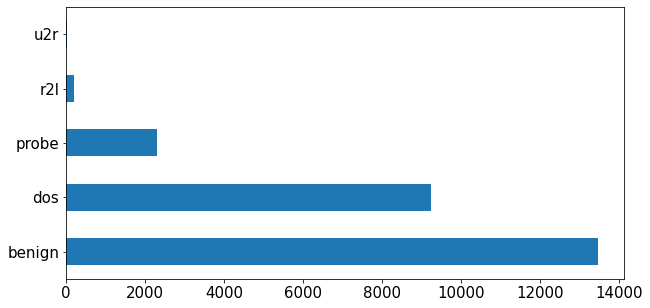

In [6]:
####################
# CODE PROVIDED - you get this one for free
train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)


In [7]:
####################
# YOUR CODE

# Apply the standard scaler on the numerical data

#### Binary classifier

In [8]:
####################
# YOUR CODE

# Use train_X, train_Y_bin, test_X, test_Y_bin here

#### Binary nonlinear classifier

In [9]:
####################
# YOUR CODE

# Use train_X, train_Y_bin, test_X, test_Y_bin here

#### Multi-class linear classifier

In [10]:
####################
# YOUR CODE

# Use train_X, train_Y_multi, test_X, test_Y_multi here